# Survival Analysis

In [23]:
# Import Packages:
using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("StatsBase")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [2]:
# Read the CSV File:
using CSV
using DataFrames
using Dates
using Plots

In [3]:
# Load the CSV file
file_path = "../data/AbsenceList_SampleData.csv"  # Update with the correct file path
data = CSV.File(file_path, delim='\t') |> DataFrame

Row,Full name,First name,ID,Class,Start date,Start time,End date,End time
,String7,String7,Missing,String7,String15,String15,String15,String15
1,Last01,First01,missing,CS101,"Sep 27, 2023",8:30 AM,"Sep 27, 2023",12:15 PM
2,Last01,First01,missing,CS101,"Sep 27, 2023",1:15 PM,"Sep 27, 2023",3:00 PM
3,Last01,First01,missing,CS101,"Sep 29, 2023",1:15 PM,"Sep 29, 2023",3:00 PM
4,Last01,First01,missing,CS101,"Oct 3, 2023",8:30 AM,"Oct 3, 2023",9:20 AM
5,Last01,First01,missing,CS101,"Oct 3, 2023",9:25 AM,"Oct 3, 2023",12:15 PM
6,Last01,First01,missing,CS101,"Dec 8, 2023",1:15 PM,"Dec 8, 2023",3:00 PM
7,Last02,First02,missing,CS101,"Oct 3, 2023",8:55 AM,"Oct 3, 2023",9:20 AM
8,Last02,First02,missing,CS101,"Oct 9, 2023",1:15 PM,"Oct 9, 2023",4:50 PM
9,Last02,First02,missing,CS101,"Oct 10, 2023",8:30 AM,"Oct 10, 2023",10:15 AM


## Create a new date variable for "Start date"
This step is necessary as the variable is not standard and therefore not recognized by the "Date" package.

In [4]:


# Extract the last 4 characters of "Start date" and create a new column "Year"
data[!, "Year"] = last.(string.(data[!, "Start date"]), 4)

# Extract the first 5 characters of "Start date" and create a new column "First5Chars"
data[!, "First5Chars"] = first.(string.(data[!, "Start date"]), 6)

# Remove the comma from "First5Chars" and update the column
data[!, "First5Chars"] = replace.(data[!, "First5Chars"], "," => "")

# Extract the first three characters of "First5Chars" and create a new column "Month"
data[!, "Month"] = first.(string.(data[!, "First5Chars"]), 3)

# Extract the last two characters of "First5Chars" and create a new column "Day"
data[!, "Day"] = last.(string.(data[!, "First5Chars"]), 2)


# Define a dictionary to map month abbreviations to numerical values
month_dict = Dict("Jan" => 1, "Feb" => 2, "Mar" => 3, "Apr" => 4, "May" => 5, "Jun" => 6, "Jul" => 7, "Aug" => 8, "Sep" => 9, "Oct" => 10, "Nov" => 11, "Dec" => 12)

# Create a new column "MonthNumeric" by mapping the month abbreviations to numerical values
data[!, "MonthNumeric"] = [month_dict[strip(string(month))] for month in data[!, "Month"]]

# Create a new column "NewDate" by combining "Year," "MonthNumeric," and "Day"
data[!, "StartDate"] = Dates.Date.(parse.(Int, data[!, "Year"]), data[!, "MonthNumeric"], parse.(Int, data[!, "Day"]))

# Suppose you want to delete columns "Month" and "Year"
select!(data, Not(:Month, :Year, :Day, :First5Chars, :MonthNumeric  ))


Row,Full name,First name,ID,Class,Start date,Start time,End date,End time,StartDate
,String7,String7,Missing,String7,String15,String15,String15,String15,Date
1,Last01,First01,missing,CS101,"Sep 27, 2023",8:30 AM,"Sep 27, 2023",12:15 PM,2023-09-27
2,Last01,First01,missing,CS101,"Sep 27, 2023",1:15 PM,"Sep 27, 2023",3:00 PM,2023-09-27
3,Last01,First01,missing,CS101,"Sep 29, 2023",1:15 PM,"Sep 29, 2023",3:00 PM,2023-09-29
4,Last01,First01,missing,CS101,"Oct 3, 2023",8:30 AM,"Oct 3, 2023",9:20 AM,2023-10-03
5,Last01,First01,missing,CS101,"Oct 3, 2023",9:25 AM,"Oct 3, 2023",12:15 PM,2023-10-03
6,Last01,First01,missing,CS101,"Dec 8, 2023",1:15 PM,"Dec 8, 2023",3:00 PM,2023-12-08
7,Last02,First02,missing,CS101,"Oct 3, 2023",8:55 AM,"Oct 3, 2023",9:20 AM,2023-10-03
8,Last02,First02,missing,CS101,"Oct 9, 2023",1:15 PM,"Oct 9, 2023",4:50 PM,2023-10-09
9,Last02,First02,missing,CS101,"Oct 10, 2023",8:30 AM,"Oct 10, 2023",10:15 AM,2023-10-10


## Create a new date variable for "End date"
This step is necessary as the variable is not standard and therefore not recognized by the "Date" package.

In [5]:


# Extract the last 4 characters of "Start date" and create a new column "Year"
data[!, "Year"] = last.(string.(data[!, "End date"]), 4)

# Extract the first 5 characters of "Start date" and create a new column "First5Chars"
data[!, "First5Chars"] = first.(string.(data[!, "End date"]), 6)

# Remove the comma from "First5Chars" and update the column
data[!, "First5Chars"] = replace.(data[!, "First5Chars"], "," => "")

# Extract the first three characters of "First5Chars" and create a new column "Month"
data[!, "Month"] = first.(string.(data[!, "First5Chars"]), 3)

# Extract the last two characters of "First5Chars" and create a new column "Day"
data[!, "Day"] = last.(string.(data[!, "First5Chars"]), 2)


# Define a dictionary to map month abbreviations to numerical values
month_dict = Dict("Jan" => 1, "Feb" => 2, "Mar" => 3, "Apr" => 4, "May" => 5, "Jun" => 6, "Jul" => 7, "Aug" => 8, "Sep" => 9, "Oct" => 10, "Nov" => 11, "Dec" => 12)

# Create a new column "MonthNumeric" by mapping the month abbreviations to numerical values
data[!, "MonthNumeric"] = [month_dict[strip(string(month))] for month in data[!, "Month"]]

# Create a new column "NewDate" by combining "Year," "MonthNumeric," and "Day"
data[!, "EndDate"] = Dates.Date.(parse.(Int, data[!, "Year"]), data[!, "MonthNumeric"], parse.(Int, data[!, "Day"]))

# Suppose you want to delete columns "Month" and "Year"
select!(data, Not(:Month, :Year, :Day, :First5Chars, :MonthNumeric  ))


Row,Full name,First name,ID,Class,Start date,Start time,End date,End time,StartDate,EndDate
,String7,String7,Missing,String7,String15,String15,String15,String15,Date,Date
1,Last01,First01,missing,CS101,"Sep 27, 2023",8:30 AM,"Sep 27, 2023",12:15 PM,2023-09-27,2023-09-27
2,Last01,First01,missing,CS101,"Sep 27, 2023",1:15 PM,"Sep 27, 2023",3:00 PM,2023-09-27,2023-09-27
3,Last01,First01,missing,CS101,"Sep 29, 2023",1:15 PM,"Sep 29, 2023",3:00 PM,2023-09-29,2023-09-29
4,Last01,First01,missing,CS101,"Oct 3, 2023",8:30 AM,"Oct 3, 2023",9:20 AM,2023-10-03,2023-10-03
5,Last01,First01,missing,CS101,"Oct 3, 2023",9:25 AM,"Oct 3, 2023",12:15 PM,2023-10-03,2023-10-03
6,Last01,First01,missing,CS101,"Dec 8, 2023",1:15 PM,"Dec 8, 2023",3:00 PM,2023-12-08,2023-12-08
7,Last02,First02,missing,CS101,"Oct 3, 2023",8:55 AM,"Oct 3, 2023",9:20 AM,2023-10-03,2023-10-03
8,Last02,First02,missing,CS101,"Oct 9, 2023",1:15 PM,"Oct 9, 2023",4:50 PM,2023-10-09,2023-10-09
9,Last02,First02,missing,CS101,"Oct 10, 2023",8:30 AM,"Oct 10, 2023",10:15 AM,2023-10-10,2023-10-10


## Create a new date variable for "Start time"
This step is necessary as the variable is not standard and therefore not recognized by the "Date" package.

In [6]:
starttime = data[!, "Start time"]
meridiem = last.(starttime,2)
time = first.(starttime,5)
hourtemp = first.(time,2)
minutetemp = last.(time,3)
minutetemp1 = replace.(minutetemp, ":" => "")
minutetemp2 = replace.(minutetemp1, " " => "")

hour = replace.(hourtemp, ":" => "")
minute = minutetemp2

data[!,"StartTimeHour"] = hour;
data[!,"StartTimeMinute"] = minute;
data[!,"StartTimeMeridiem"] = meridiem;

# Define as Time format
data[!,"time_format_str"] = hour .* ":" .* minute .* " " .* meridiem
data[!,"StartTime"] = Dates.Time.(data[!,"time_format_str"], dateformat"HH:MM p")

# Drop variables
select!(data, Not(:StartTimeHour, :StartTimeMinute, :StartTimeMeridiem, :time_format_str  ))


Row,Full name,First name,ID,Class,Start date,Start time,End date,End time,StartDate,EndDate,StartTime
,String7,String7,Missing,String7,String15,String15,String15,String15,Date,Date,Time
1,Last01,First01,missing,CS101,"Sep 27, 2023",8:30 AM,"Sep 27, 2023",12:15 PM,2023-09-27,2023-09-27,08:30:00
2,Last01,First01,missing,CS101,"Sep 27, 2023",1:15 PM,"Sep 27, 2023",3:00 PM,2023-09-27,2023-09-27,13:15:00
3,Last01,First01,missing,CS101,"Sep 29, 2023",1:15 PM,"Sep 29, 2023",3:00 PM,2023-09-29,2023-09-29,13:15:00
4,Last01,First01,missing,CS101,"Oct 3, 2023",8:30 AM,"Oct 3, 2023",9:20 AM,2023-10-03,2023-10-03,08:30:00
5,Last01,First01,missing,CS101,"Oct 3, 2023",9:25 AM,"Oct 3, 2023",12:15 PM,2023-10-03,2023-10-03,09:25:00
6,Last01,First01,missing,CS101,"Dec 8, 2023",1:15 PM,"Dec 8, 2023",3:00 PM,2023-12-08,2023-12-08,13:15:00
7,Last02,First02,missing,CS101,"Oct 3, 2023",8:55 AM,"Oct 3, 2023",9:20 AM,2023-10-03,2023-10-03,08:55:00
8,Last02,First02,missing,CS101,"Oct 9, 2023",1:15 PM,"Oct 9, 2023",4:50 PM,2023-10-09,2023-10-09,13:15:00
9,Last02,First02,missing,CS101,"Oct 10, 2023",8:30 AM,"Oct 10, 2023",10:15 AM,2023-10-10,2023-10-10,08:30:00


## Create a new date variable for "End time"
This step is necessary as the variable is not standard and therefore not recognized by the "Date" package.

In [7]:
endtime = data[!, "End time"]
meridiem = last.(endtime,2)
time = first.(endtime,5)
hourtemp = first.(time,2)
minutetemp = last.(time,3)
minutetemp1 = replace.(minutetemp, ":" => "")
minutetemp2 = replace.(minutetemp1, " " => "")

hour = replace.(hourtemp, ":" => "")
minute = minutetemp2

data[!,"EndTimeHour"] = hour;
data[!,"EndTimeMinute"] = minute;
data[!,"EndTimeMeridiem"] = meridiem;

# Define as Time format
data[!,"time_format_str"] = hour .* ":" .* minute .* " " .* meridiem
data[!,"EndTime"] = Dates.Time.(data[!,"time_format_str"], dateformat"HH:MM p")

# Drop variables
select!(data, Not(:EndTimeHour, :EndTimeMinute, :EndTimeMeridiem, :time_format_str  ))

Row,Full name,First name,ID,Class,Start date,Start time,End date,End time,StartDate,EndDate,StartTime,EndTime
,String7,String7,Missing,String7,String15,String15,String15,String15,Date,Date,Time,Time
1,Last01,First01,missing,CS101,"Sep 27, 2023",8:30 AM,"Sep 27, 2023",12:15 PM,2023-09-27,2023-09-27,08:30:00,12:15:00
2,Last01,First01,missing,CS101,"Sep 27, 2023",1:15 PM,"Sep 27, 2023",3:00 PM,2023-09-27,2023-09-27,13:15:00,15:00:00
3,Last01,First01,missing,CS101,"Sep 29, 2023",1:15 PM,"Sep 29, 2023",3:00 PM,2023-09-29,2023-09-29,13:15:00,15:00:00
4,Last01,First01,missing,CS101,"Oct 3, 2023",8:30 AM,"Oct 3, 2023",9:20 AM,2023-10-03,2023-10-03,08:30:00,09:20:00
5,Last01,First01,missing,CS101,"Oct 3, 2023",9:25 AM,"Oct 3, 2023",12:15 PM,2023-10-03,2023-10-03,09:25:00,12:15:00
6,Last01,First01,missing,CS101,"Dec 8, 2023",1:15 PM,"Dec 8, 2023",3:00 PM,2023-12-08,2023-12-08,13:15:00,15:00:00
7,Last02,First02,missing,CS101,"Oct 3, 2023",8:55 AM,"Oct 3, 2023",9:20 AM,2023-10-03,2023-10-03,08:55:00,09:20:00
8,Last02,First02,missing,CS101,"Oct 9, 2023",1:15 PM,"Oct 9, 2023",4:50 PM,2023-10-09,2023-10-09,13:15:00,16:50:00
9,Last02,First02,missing,CS101,"Oct 10, 2023",8:30 AM,"Oct 10, 2023",10:15 AM,2023-10-10,2023-10-10,08:30:00,10:15:00


In [8]:
data[!, "TimeMissed"] = data[!, "EndTime"] - data[!, "StartTime"] 

# Convert to minutes
data[!, "MinutesMissed"] = floor.(Int, Dates.value.(data[!, "TimeMissed"]) / (60 * 10^9))

# Drop variables
select!(data, Not(:TimeMissed ))

display(data)

Row,Full name,First name,ID,Class,Start date,Start time,End date,End time,StartDate,EndDate,StartTime,EndTime,MinutesMissed
,String7,String7,Missing,String7,String15,String15,String15,String15,Date,Date,Time,Time,Int64
1,Last01,First01,missing,CS101,"Sep 27, 2023",8:30 AM,"Sep 27, 2023",12:15 PM,2023-09-27,2023-09-27,08:30:00,12:15:00,225
2,Last01,First01,missing,CS101,"Sep 27, 2023",1:15 PM,"Sep 27, 2023",3:00 PM,2023-09-27,2023-09-27,13:15:00,15:00:00,105
3,Last01,First01,missing,CS101,"Sep 29, 2023",1:15 PM,"Sep 29, 2023",3:00 PM,2023-09-29,2023-09-29,13:15:00,15:00:00,105
4,Last01,First01,missing,CS101,"Oct 3, 2023",8:30 AM,"Oct 3, 2023",9:20 AM,2023-10-03,2023-10-03,08:30:00,09:20:00,50
5,Last01,First01,missing,CS101,"Oct 3, 2023",9:25 AM,"Oct 3, 2023",12:15 PM,2023-10-03,2023-10-03,09:25:00,12:15:00,170
6,Last01,First01,missing,CS101,"Dec 8, 2023",1:15 PM,"Dec 8, 2023",3:00 PM,2023-12-08,2023-12-08,13:15:00,15:00:00,105
7,Last02,First02,missing,CS101,"Oct 3, 2023",8:55 AM,"Oct 3, 2023",9:20 AM,2023-10-03,2023-10-03,08:55:00,09:20:00,25
8,Last02,First02,missing,CS101,"Oct 9, 2023",1:15 PM,"Oct 9, 2023",4:50 PM,2023-10-09,2023-10-09,13:15:00,16:50:00,215
9,Last02,First02,missing,CS101,"Oct 10, 2023",8:30 AM,"Oct 10, 2023",10:15 AM,2023-10-10,2023-10-10,08:30:00,10:15:00,105


In [9]:
# Create a new DataFrame with the required variables
result_df = combine(groupby(data, [Symbol("Full name"), :StartDate]), :MinutesMissed => sum)

# Rename columns for clarity
rename!(result_df, :MinutesMissed_sum => :TotalMinutesMissed)

# Display the result DataFrame
display(result_df)

Row,Full name,StartDate,TotalMinutesMissed
,String7,Date,Int64
1,Last01,2023-09-27,330
2,Last01,2023-09-29,105
3,Last01,2023-10-03,220
4,Last01,2023-12-08,105
5,Last02,2023-10-03,25
6,Last02,2023-10-09,215
7,Last02,2023-10-10,210
8,Last02,2023-10-11,2
9,Last02,2023-10-13,20


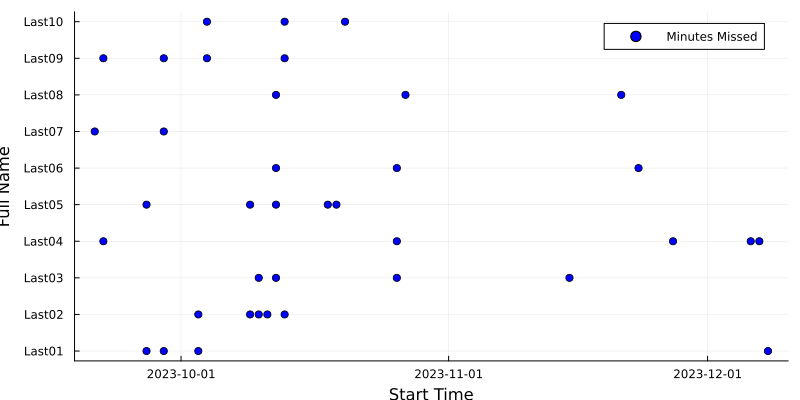

In [10]:


# Scatter plot
scatter(result_df[!, "StartDate"], result_df[!, "Full name"], size=(800, 400), marker=:circle, color=:blue, label="Minutes Missed", xlabel="Start Time", ylabel="Full Name")


In [11]:
# Group by start time and calculate the frequency for each time
time_summary = combine(groupby(result_df, :StartDate), nrow)

# Display the frequency table
display(time_summary)

Row,StartDate,nrow
,Date,Int64
1,2023-09-27,2
2,2023-09-29,3
3,2023-10-03,2
4,2023-12-08,1
5,2023-10-09,2
6,2023-10-10,2
7,2023-10-11,1
8,2023-10-13,3
9,2023-10-12,4


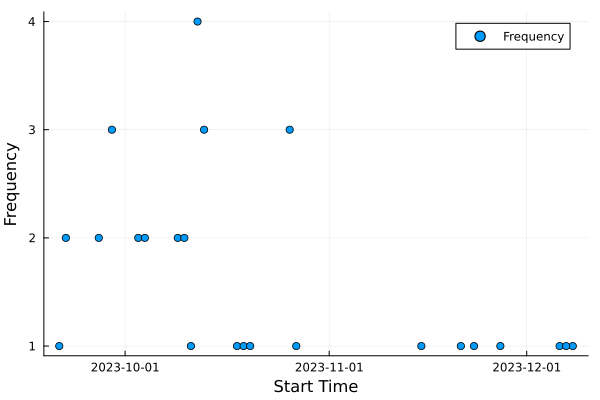

In [12]:
scatter(time_summary[!, "StartDate"], time_summary[!, :nrow], xlabel="Start Time", ylabel="Frequency", label="Frequency")


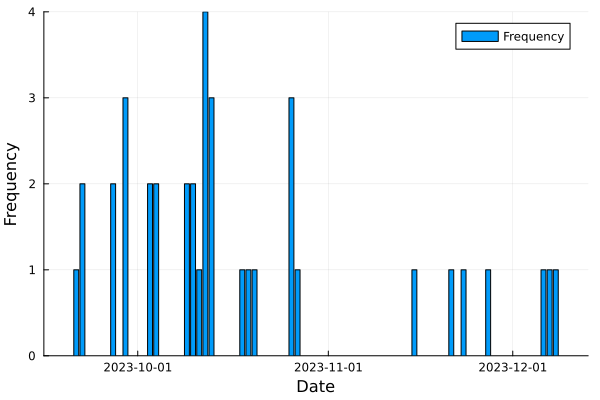

In [13]:
bar(time_summary[!, "StartDate"], time_summary[!, :nrow], xlabel="Date", ylabel="Frequency", label="Frequency")


In [14]:
# Feature engineering: Extract day of the week
result_df[!, "DayOfWeek"] = Dates.dayname.(Dates.Date.(result_df[!, "StartDate"]))

# Filter out weekends and holidays
weekdays_df = result_df[(result_df[!, "DayOfWeek"] .!= "Saturday") .& (result_df[!, "DayOfWeek"] .!= "Sunday"), :]




Row,Full name,StartDate,TotalMinutesMissed,DayOfWeek
,String7,Date,Int64,String
1,Last01,2023-09-27,330,Wednesday
2,Last01,2023-09-29,105,Friday
3,Last01,2023-10-03,220,Tuesday
4,Last01,2023-12-08,105,Friday
5,Last02,2023-10-03,25,Tuesday
6,Last02,2023-10-09,215,Monday
7,Last02,2023-10-10,210,Tuesday
8,Last02,2023-10-11,2,Wednesday
9,Last02,2023-10-13,20,Friday


In [15]:
# Group by student and weekday and count absences
grouped_df = groupby(weekdays_df, [Symbol("Full name"), :DayOfWeek])
count_df = combine(grouped_df, :TotalMinutesMissed => sum => :AbsenceCount)


Row,Full name,DayOfWeek,AbsenceCount
,String7,String,Int64
1,Last01,Wednesday,330
2,Last01,Friday,210
3,Last01,Tuesday,220
4,Last02,Tuesday,235
5,Last02,Monday,215
6,Last02,Wednesday,2
7,Last02,Friday,20
8,Last03,Tuesday,36
9,Last03,Thursday,325


In [16]:
# Find the weekday with the maximum absences for each student
max_absence_day_df = combine(groupby(count_df, "Full name"), :AbsenceCount => argmax => :DayOfWeek, :AbsenceCount => maximum => :MaxAbsences)

# Add a column with the corresponding weekday
max_absence_day_df[!, "Weekday"] = Dates.dayname.(Dates.Date.(max_absence_day_df[!, "DayOfWeek"]))

# Display the result
display(max_absence_day_df)

Row,Full name,DayOfWeek,MaxAbsences,Weekday
,String7,Int64,Int64,String
1,Last01,1,330,Monday
2,Last02,1,235,Monday
3,Last03,2,325,Tuesday
4,Last04,2,775,Tuesday
5,Last05,1,248,Monday
6,Last06,1,430,Monday
7,Last07,2,315,Tuesday
8,Last08,2,330,Tuesday
9,Last09,1,215,Monday


In [18]:
# Create a DataFrame with all the dates you want to include
all_dates = DataFrame(StartDate = Date(2023, 9, 19):Date(2023, 12, 15))

# Filter weekdays
all_dates = filter(row -> Dates.dayofweek(row.StartDate) in 2:6, all_dates)


Row,StartDate
,Date
1,2023-09-19
2,2023-09-20
3,2023-09-21
4,2023-09-22
5,2023-09-23
6,2023-09-26
7,2023-09-27
8,2023-09-28
9,2023-09-29


In [26]:
describe(result_df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Any,Any,Int64,DataType
1,Full name,,Last01,,Last10,0,String7
2,StartDate,,2023-09-21,2023-10-12,2023-12-08,0,Date
3,TotalMinutesMissed,154.289,2,105.0,610,0,Int64
4,DayOfWeek,,Friday,,Wednesday,0,String


## Create a database with all school days

In [88]:
display(result_df)

Row,Full_name,StartDate,TotalMinutesMissed,DayOfWeek
,String7,Date,Int64,String
1,Last01,2023-09-27,330,Wednesday
2,Last01,2023-09-29,105,Friday
3,Last01,2023-10-03,220,Tuesday
4,Last01,2023-12-08,105,Friday
5,Last02,2023-10-03,25,Tuesday
6,Last02,2023-10-09,215,Monday
7,Last02,2023-10-10,210,Tuesday
8,Last02,2023-10-11,2,Wednesday
9,Last02,2023-10-13,20,Friday


In [87]:
using DataFrames
using Dates

# Rename the DataFrame
df = result_df

rename!(df,:"Full name" => :Full_name)

# Keep only the rows where DayOfWeek is "Friday"
df_filtered = filter(row -> row."Full name" == "Last01", df)

LoadError: ArgumentError: Tried renaming :Full name to :Full_name, when :Full name does not exist in the data frame.

## SANDBOX

In [45]:
using DataFrames
using Dates

# Define the input DataFrame
df_full = DataFrame(
    Full_name = String[],
    StartDate = Date[],
    TotalMinutesMissed = Int64[],
    DayOfWeek = String[]
)

# Define the date range
date_range = Date(2023, 9, 27):Day(1):Date(2023, 12, 8)

# Populate the DataFrame with the specified formats
for date in date_range
    push!(df_full, [
        "Last01",
        date,
        0,
        Dates.format(date, "EEEE")
    ])
end

df_full = filter(row -> row.DayOfWeek != "Saturday" && row.DayOfWeek != "Sunday", df_full)


# Print the resulting DataFrame
println(df_full)


53×4 DataFrame
 Row │ Full_name  StartDate   TotalMinutesMissed  DayOfWeek 
     │ String     Date        Int64               String    
─────┼──────────────────────────────────────────────────────
   1 │ Last01     2023-09-27                   0  Wednesday
   2 │ Last01     2023-09-28                   0  Thursday
   3 │ Last01     2023-09-29                   0  Friday
   4 │ Last01     2023-10-02                   0  Monday
   5 │ Last01     2023-10-03                   0  Tuesday
   6 │ Last01     2023-10-04                   0  Wednesday
   7 │ Last01     2023-10-05                   0  Thursday
   8 │ Last01     2023-10-06                   0  Friday
   9 │ Last01     2023-10-09                   0  Monday
  10 │ Last01     2023-10-10                   0  Tuesday
  11 │ Last01     2023-10-11                   0  Wednesday
  12 │ Last01     2023-10-12                   0  Thursday
  13 │ Last01     2023-10-13                   0  Friday
  14 │ Last01     2023-10-16                

In [84]:
# Merge DataFrame A into DataFrame B, overwriting values in B with values in A
#df_complete = join(df_full, df_filtered, on = :TotalMinutesMissed, kind = :left, makeunique = true)

#df_complete = innerjoin(df_full, df_filtered, on = :TotalMinutesMissed, makeunique=true)

merged = outerjoin(df_full, df_filtered, on = :TotalMinutesMissed, makeunique=true)


Row,Full_name,StartDate,TotalMinutesMissed,DayOfWeek,Full name,StartDate_1,DayOfWeek_1
,String?,Date?,Int64,String?,String7?,Date?,String?
1,Last01,2023-09-27,0,Wednesday,missing,missing,missing
2,Last01,2023-09-28,0,Thursday,missing,missing,missing
3,Last01,2023-09-29,0,Friday,missing,missing,missing
4,Last01,2023-10-02,0,Monday,missing,missing,missing
5,Last01,2023-10-03,0,Tuesday,missing,missing,missing
6,Last01,2023-10-04,0,Wednesday,missing,missing,missing
7,Last01,2023-10-05,0,Thursday,missing,missing,missing
8,Last01,2023-10-06,0,Friday,missing,missing,missing
9,Last01,2023-10-09,0,Monday,missing,missing,missing


In [2]:
using DataFrames

# Create two dataframes
df_a = DataFrame(A = [1, 2], B = [4, 5])
df_b = DataFrame(A = [1, 2, 3], B = [4, 11, 6])

# Merge the two dataframes
merged = outerjoin(df_a, df_b, on = :A, makeunique=true)

# Print the merged dataframe
print(merged)

3×3 DataFrame
 Row │ A      B        B_1    
     │ Int64  Int64?   Int64? 
─────┼────────────────────────
   1 │     1        4       4
   2 │     2        5      11
   3 │     3  missing       6

LoadError: type Array has no field update